# Simulación

Si $\;\boldsymbol{y}=\mathbf{W}\boldsymbol{x}+\boldsymbol{\mu}$ es una afinidad de $\;\boldsymbol{x}\sim\mathcal{N}(\boldsymbol{0}, \mathbf{I}_D)$, entonces $\;\boldsymbol{y}\sim\mathcal{N}(\boldsymbol{\mu}, \mathbf{\Sigma})$ con $\;\mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t$. Por tanto, simular una Gaussiana general se reduce a simular una Gaussiana estándar y aplicar una afinidad. La simulación de una Gaussiana (multivariada) estándar es fácil ya que basta generar números aleatorios Gaussianos estándar. Así pues, si solo tenemos $\;\mathbf{\Sigma}$, tan solo resta hallar su raiz $\mathbf{W}$ mediante, por ejemplo, su descomposición propia
$$\mathbf{\Sigma}=\mathbf{U}\boldsymbol{\Lambda}\mathbf{U}^t%
\quad\to\quad%
\mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t%
\;\text{con}\;%
\mathbf{W}=\mathbf{U}\boldsymbol{\Lambda}^{1/2}$$
y simular la Gaussiana general con
$$\boldsymbol{y}=\boldsymbol{\mu}+\mathbf{U}\mathbf{\Lambda}^{1/2}\boldsymbol{x}$$


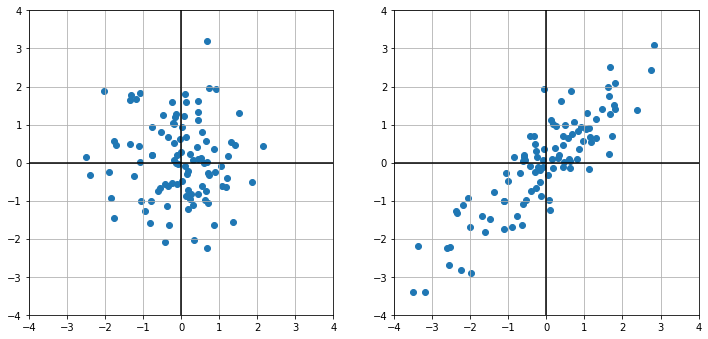

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

np.random.seed(23)
mu = np.array([.0, .0])
I = np.array([[1., .0], [.0, 1.]])
S = np.array([[2., 1.8], [1.8, 2.]])
La, U = np.linalg.eigh(S)
i = La.argsort()[::-1]; La = La[i]; U = U[:,i]
W = U @ np.diag(np.sqrt(La))
X = multivariate_normal(cov=I).rvs(100)
Y = X @ W.T + mu
x_min = y_min = -4.0
x_max = y_max = 4.0
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[0].grid(); axes[0].axhline(0, color='black'); axes[0].axvline(0, color='black')
axes[0].scatter(X[:,0], X[:,1])
axes[1].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[1].grid(); axes[1].axhline(0, color='black'); axes[1].axvline(0, color='black')
axes[1].scatter(Y[:,0], Y[:,1]);

La afinidad $\;\boldsymbol{y}=\mathbf{W}\boldsymbol{x}+\boldsymbol{\mu}$ transforma muestras de una Gaussiana estándar en muestras de una Gaussiana general. Asimismo, desde un punto de vista geométrico, también transforma una hiperesfera Euclídea de radio $r$ en un hiperelipsoide Mahalanobis de radio $r$ (con $r\mathbf{W}$ en lugar de $\mathbf{W}$). Supongamos que, dada una probabilidad $p$, p.e. $0.95$, somos capaces de determinar el radio $r(p)$ de la hiperesfera Euclídea que encierra dicha probabilidad en el caso de la Gaussiana estándar. Claramente, $r(p)$ también será el radio del hiperelipsoide Mahalanobis (centrado en $\boldsymbol{\mu}$) que encierra una probabilidad $p$ en el caso de una Gaussiana general en $\boldsymbol{\mu}$ con $\mathbf{\Sigma}=\mathbf{W}\mathbf{W}^t$.

Si $\boldsymbol{x}$ es $\mathcal{N}(\boldsymbol{0}_D, \boldsymbol{I}_D)$, $\lVert\boldsymbol{x}\rVert_2^2$ sigue una distribución chi-cuadrado con $D$ grados de libertad, $\chi_D^2$, por lo que $r(p)$ puede derminarse a partir de su función de distribución, $P(\chi_D^2\leq r(p))=p$. En el caso $D=2$, tenemos:
$$r(p)=\sqrt{-2\log(1-p)}$$

El radio que encierra un 95.0% de probabilidad es 2.45


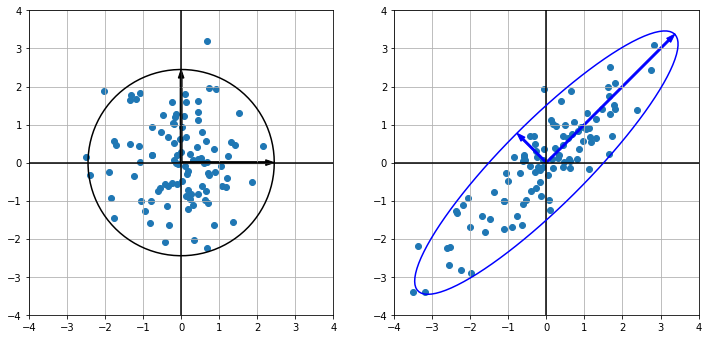

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[0].grid(); axes[0].axhline(0, color='black'); axes[0].axvline(0, color='black')
axes[0].scatter(X[:,0], X[:,1])
axes[1].set(aspect='equal', xlim=(x_min, x_max), ylim=(y_min, y_max))
axes[1].grid(); axes[1].axhline(0, color='black'); axes[1].axvline(0, color='black')
axes[1].scatter(Y[:,0], Y[:,1])

t = np.linspace(0, 2.0 * np.pi, 100)
p = .95
r = np.sqrt(-2.0*np.log(1.0-p))
print('El radio que encierra un {:.1%} de probabilidad es {:.2f}'.format(p, r))
circunferencia_r = np.array([np.cos(t), np.sin(t)]) * r
elipse = W @ circunferencia_r
axes[0].plot(circunferencia_r[0, :], circunferencia_r[1, :], color='black')
axes[0].arrow(x=0, y=0, dx=r, dy=0, width=.05, shape='full',length_includes_head=True, color='black')
axes[0].arrow(x=0, y=0, dx=0, dy=r, width=.05, shape='full',length_includes_head=True, color='black')
axes[1].plot(elipse[0, :], elipse[1, :], color='blue')
dx, dy = r * W @ np.array([1, 0]).T
axes[1].arrow(0, 0, dx, dy, width=.05, shape='full',length_includes_head=True, color='blue')
dx, dy = r * W @ np.array([0, 1]).T
axes[1].arrow(0, 0, dx, dy, width=.05, shape='full',length_includes_head=True, color='blue');